#Original Dataset

In [7]:
#library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#get data from csv
DB_crime = pd.read_csv("./london_crime_by_lsoa.csv")
DB_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [9]:
#info kolom
DB_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [10]:
#mengambil 5 data teratas
DB_crime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [11]:
#mengambil 5 data terbawah
DB_crime.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


In [12]:
#ukuran 
DB_crime.shape

(13490604, 7)

In [13]:
DB_crime.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

#area plot (√)

Untuk case ini mau membuat area plot untuk major_category, 

In [14]:
DB_crime

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [15]:
#menghapus coloum yang tidak di gunakan
Crime_by_year = DB_crime.drop(["lsoa_code","borough","month","minor_category"], axis=1)
Crime_by_year

,major_category,value,year
0,Burglary,0,2016
1,Violence Against the Person,0,2016
2,Violence Against the Person,0,2015
3,Burglary,0,2016
4,Robbery,0,2008
...,...,...,...
13490599,Criminal Damage,0,2015
13490600,Robbery,1,2015
13490601,Burglary,0,2011
13490602,Robbery,0,2011


In [16]:
crime_by_major_category = Crime_by_year.groupby(['year','major_category']).sum() #mengelompokkan data by year dan major 
crime_by_major_category.reset_index(inplace=True)#mereset index
crime_by_major_category.sort_values(by="value",ascending=False,inplace=True)#mengurutkan dari yang terbesar menurut value
crime_by_major_category

,year,major_category,value
43,2012,Theft and Handling,334054
34,2011,Theft and Handling,309292
52,2013,Theft and Handling,306372
79,2016,Theft and Handling,294133
25,2010,Theft and Handling,290924
...,...,...,...
42,2012,Sexual Offences,0
12,2009,Fraud or Forgery,0
24,2010,Sexual Offences,0
51,2013,Sexual Offences,0


In [17]:
crime_by_major_category.rename(columns={'value':'total'}, inplace=True)#rename kolom value menjadi total
crime_by_major_category

,year,major_category,total
43,2012,Theft and Handling,334054
34,2011,Theft and Handling,309292
52,2013,Theft and Handling,306372
79,2016,Theft and Handling,294133
25,2010,Theft and Handling,290924
...,...,...,...
42,2012,Sexual Offences,0
12,2009,Fraud or Forgery,0
24,2010,Sexual Offences,0
51,2013,Sexual Offences,0


In [18]:
crime_by_major_category = crime_by_major_category.pivot(index='year', columns='major_category', values='total')
crime_by_major_category

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


Text(0.5, 1.0, 'major_category')

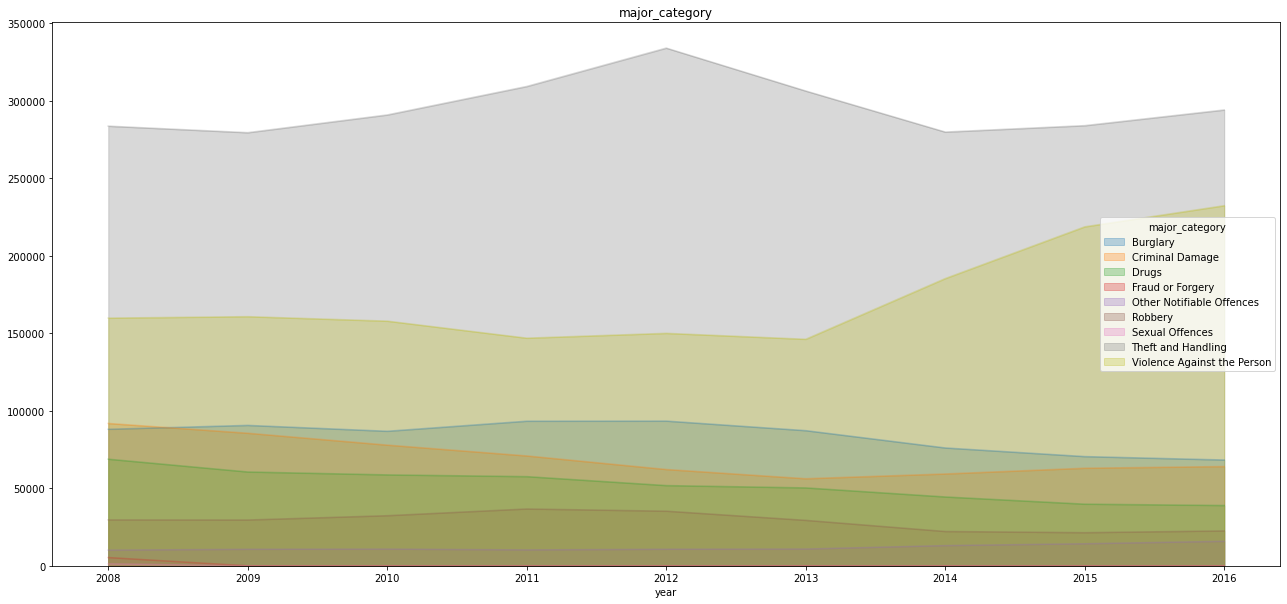

In [19]:
#visualisasi dalam bentuk area
crime_by_major_category = crime_by_major_category.plot(kind="area",figsize=(22,10),alpha=0.3, stacked=False)
crime_by_major_category.set_title("major_category")

#Bar Chart (√)

Untuk case bar chart ingin menampilkan 10 kota dengan tingkat kejahatan tertinggi berdasarkan data dari tahun 2008 sampai 2016

In [20]:
DB_bar = DB_crime.drop(["lsoa_code","minor_category","month","major_category"], axis=1)
DB_bar

,borough,value,year
0,Croydon,0,2016
1,Greenwich,0,2016
2,Bromley,0,2015
3,Redbridge,0,2016
4,Wandsworth,0,2008
...,...,...,...
13490599,Brent,0,2015
13490600,Hillingdon,1,2015
13490601,Sutton,0,2011
13490602,Croydon,0,2011


In [21]:
borough = DB_bar.groupby("borough").sum()
borough 

,value,year
borough,,
Barking and Dagenham,149447,625812480
Barnet,212191,1152537984
Bexley,114136,775964016
Brent,227551,987175728
Bromley,184349,1054102896
Camden,275147,761405184
City of London,780,19556640
Croydon,260294,1211425200
Ealing,251562,1105384752


In [22]:
borough = borough.drop(["year"], axis=1)
borough

,value
borough,
Barking and Dagenham,149447
Barnet,212191
Bexley,114136
Brent,227551
Bromley,184349
Camden,275147
City of London,780
Croydon,260294
Ealing,251562


<AxesSubplot:title={'center':'top 10 London crime by city'}, xlabel='borough'>

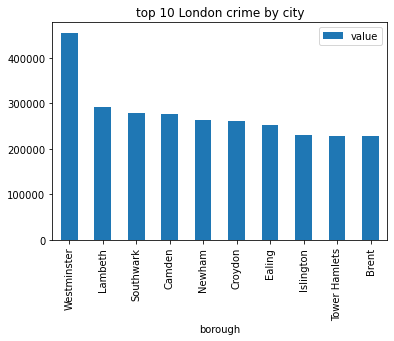

In [23]:
borough.sort_values(by="value",ascending=False,inplace=True)
borough.head(10).plot(kind="bar",title="top 10 London crime by city")

#pie Chart(√)

case ini ingin membandingkan presentase dari 5 Major_category yang berada di top 5 di sataset ini

In [24]:
#menghapus coloum yang tidak di gunakan
pie_chart_by_major = DB_crime.drop(["lsoa_code","borough","month","minor_category"], axis=1)
pie_chart_by_major

,major_category,value,year
0,Burglary,0,2016
1,Violence Against the Person,0,2016
2,Violence Against the Person,0,2015
3,Burglary,0,2016
4,Robbery,0,2008
...,...,...,...
13490599,Criminal Damage,0,2015
13490600,Robbery,1,2015
13490601,Burglary,0,2011
13490602,Robbery,0,2011


In [25]:
#menghapus coloum yang tidak di gunakan
Crime_by_year1 = DB_crime.drop(["lsoa_code","borough","month","minor_category"], axis=1)
Crime_by_year1

,major_category,value,year
0,Burglary,0,2016
1,Violence Against the Person,0,2016
2,Violence Against the Person,0,2015
3,Burglary,0,2016
4,Robbery,0,2008
...,...,...,...
13490599,Criminal Damage,0,2015
13490600,Robbery,1,2015
13490601,Burglary,0,2011
13490602,Robbery,0,2011


In [26]:
pie_chart_by_major = Crime_by_year1.groupby(['year','major_category']).sum() #mengelompokkan data by year dan major 
pie_chart_by_major.reset_index(inplace=True)#mereset index
pie_chart_by_major.sort_values(by="value",ascending=False,inplace=True)#mengurutkan dari yang terbesar menurut value
pie_chart_by_major

,year,major_category,value
43,2012,Theft and Handling,334054
34,2011,Theft and Handling,309292
52,2013,Theft and Handling,306372
79,2016,Theft and Handling,294133
25,2010,Theft and Handling,290924
...,...,...,...
42,2012,Sexual Offences,0
12,2009,Fraud or Forgery,0
24,2010,Sexual Offences,0
51,2013,Sexual Offences,0


In [27]:
pie_chart_by_major = pie_chart_by_major.pivot(index='year', columns='major_category', values='value')
pie_chart_by_major

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person
year,,,,,,,,,
2008,88092,91872,68804,5325,10112,29627,1273,283692,159844
2009,90619,85565,60549,0,10644,29568,0,279492,160777
2010,86826,77897,58674,0,10768,32341,0,290924,157894
2011,93315,70914,57550,0,10264,36679,0,309292,146901
2012,93392,62158,51776,0,10675,35260,0,334054,150014
2013,87222,56206,50278,0,10811,29337,0,306372,146181
2014,76053,59279,44435,0,13037,22150,0,279880,185349
2015,70489,62976,39785,0,14229,21383,0,284022,218740
2016,68285,64071,38914,0,15809,22528,0,294133,232381


In [28]:
pie_chart_by_major1 = pie_chart_by_major.transpose()
pie_chart_by_major1['Total'] = pie_chart_by_major1.sum(axis=1)
pie_chart_by_major1

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349
Robbery,29627,29568,32341,36679,35260,29337,22150,21383,22528,258873
Sexual Offences,1273,0,0,0,0,0,0,0,0,1273
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081


In [29]:
top5 = pie_chart_by_major1.sort_values(by="Total",ascending=False).head(5)#mengurutkan dari yang terbesar menurut value
top5

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
major_category,,,,,,,,,,
Theft and Handling,283692,279492,290924,309292,334054,306372,279880,284022,294133,2661861
Violence Against the Person,159844,160777,157894,146901,150014,146181,185349,218740,232381,1558081
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765


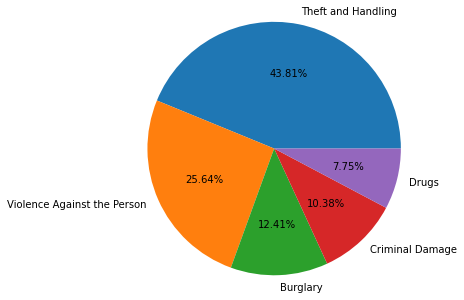

In [30]:
fig, plot = plt.subplots()
plot.pie(top5.Total,labels=top5.index, autopct='%.2f%%')
plot.axis('equal')
fig.set_size_inches(5,5)
plt.show()

5 tingkat kejahatan utama yang terjadi di london

#Word Clouds (√)

ingin mengambil kata dari Major category dimana kejahatan apa yang sering muncul dari tahun 2008 sampai 2016

In [31]:
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
DB_crime

In [ ]:
DB_crime = pd.read_csv("./london_crime_by_lsoa.csv")

text = ' '.join(DB_crime['major_category'])
wordcloud2 = WordCloud().generate(text)
# Generate plot
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()